In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
import xgboost
from sklearn.metrics import accuracy_score
%matplotlib inline

# Load and clean data 

In [3]:
#load data
csv_file = '../../../SEEM_bile_acid_data_patient.csv'
df_patient = pd.read_csv(csv_file, index_col=None,na_values=['#VALUE!', '#DIV/0!'])
csv_file2 = '../../../SEEM_bile_acid_data_control.csv'
df_control = pd.read_csv(csv_file2, index_col = None,na_values=['#VALUE!', '#DIV/0!'])

In [4]:
#remove 'Barcode','CMS ID','LC/MS code# and Group
df_control = df_patient[df_patient.Group == '3-6 month Case']
df_control = df_control.drop(['Barcode','CMS ID','LC/MS code#','Group'], axis=1)
df_control['Target'] = 1
#
df_patient = df_patient[df_patient.Group == '3-6 month Case']
df_patient = df_patient.drop(['Barcode','CMS ID','LC/MS code#','Group'], axis=1)
df_patient['Target'] = 0
#
df_control = df_control.append(df_patient)
df = df_control

# Random Forest

In [5]:
df = df.dropna()
X = df.iloc[:,1:-1]
X = X.reset_index(drop=True)
y = df.iloc[:,-1]
y = y.reset_index(drop=True)

## Train model

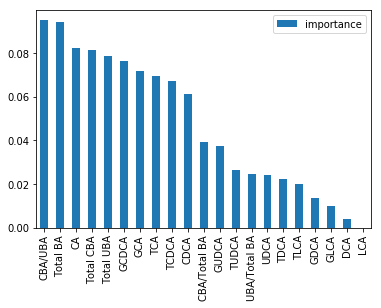

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0, random_state=42)
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
# ## And score it on your testing data.
# rf.score(X_test, y_test)


feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')

##  test_size=0.33

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

0.16972477064220184

In [51]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
TCDCA,0.105843
CDCA,0.086964
Total UBA,0.084877
GCDCA,0.082609
GCA,0.078494
CBA/UBA,0.068979
TCA,0.068562
Total BA,0.064225
Total CBA,0.062890
CA,0.060302


## XGBoost

In [52]:
xgb = xgboost.XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# xgb.score(X_test, y_pred)
accuracy_score(y_test, y_pred)

C:\Users\Saurav\Documents\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.1559633027522936

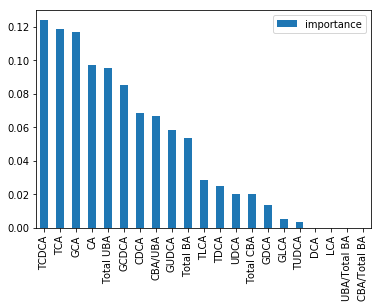

In [53]:
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')

## MLP Classifier

In [45]:
mlp = MLPClassifier(max_iter=10000)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

0.44036697247706424